In [1]:
#Importing necessary Libraries like pandas and numpy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Loading the data into the pandas dataframe. Date column is indexing and also parsed that way pandas recongnizes that column as date value
df = pd.read_excel(r'H:\Demand Forecasting\Data\Spend\Data v4\Data_BM.xlsx',index_col='date',parse_dates=True)

In [3]:
#Looking the information of the data that is uploaded into pandas, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 165 entries, 2019-05-05 to 2022-06-26
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   business_unit  165 non-null    object
 1   product        165 non-null    object
 2   country        165 non-null    object
 3   month          165 non-null    object
 4   year           165 non-null    int64 
 5   qty            165 non-null    int64 
 6   amt            165 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 10.3+ KB


In [4]:
#All unnecessary columns are removed. Only 'date' and 'amt' column is retained for analysis
df.drop(["business_unit","country","qty","month","year","product"], axis=1, inplace=True)
df.head()

,amt
date,
2019-05-05,5003053
2019-05-12,4665940
2019-05-19,5545590
2019-05-26,5692459
2019-06-02,5125903


In [ ]:
#df.isnull().sum()

In [5]:
df.shape

(165, 1)

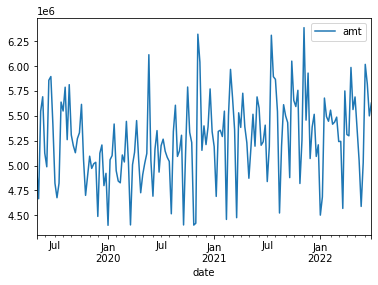

In [6]:
#Plotting the data into a line chart to visualize how it looks
df.plot()

In [7]:
#Import the seasonal decompose library to visualize the data better
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

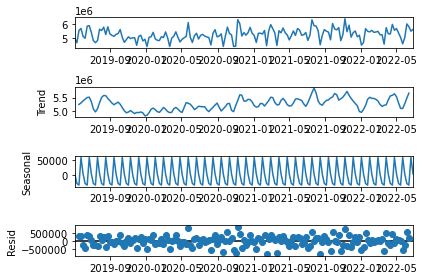

In [8]:
#The seasonal decompose of the data shows how the data looks like originally, how it looks with just the trend, with just seasonality and just the noise
#The model selected is additive and the period selected is 4
seasonal_decompose(df,model='additive',period=4).plot();

In [9]:
print(df.shape)

(165, 1)


In [10]:
#Splitting the training and test dataset
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(161, 1) (4, 1)


In [11]:
train.tail()

,amt
date,
2022-05-01,5690552
2022-05-08,5366506
2022-05-15,5048472
2022-05-22,4588371
2022-05-29,5028908


In [12]:
test

,amt
date,
2022-06-05,6018685
2022-06-12,5822638
2022-06-19,5499921
2022-06-26,5629392


In [13]:
#Importing the Exponential Smoothing model through Holt Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [14]:
#The model is fit for training dataset with the trend being 'additive' and seasonal being 'multiplicative'
hwmodel=ExponentialSmoothing(train.amt,trend='add', seasonal='mul', seasonal_periods=4).fit()

C:\Users\Memelord\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\Memelord\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [20]:
#predicting the next 4 weeks
test_pred=hwmodel.forecast(4)

In [21]:
test_pred

2022-06-05    5.268225e+06
2022-06-12    5.169053e+06
2022-06-19    5.201831e+06
2022-06-26    5.233871e+06
Freq: W-SUN, dtype: float64

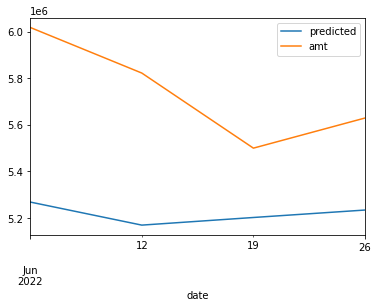

In [27]:
#Comparing the test and predicted data by plotting the values into a line chart
test_pred.plot(legend=True,label='predicted')
test['amt'].plot(legend=True)

In [28]:
#Importing rmse library
from sklearn.metrics import mean_squared_error

In [37]:
#Checking RMSE between test data and predicted data
rmse = np.sqrt(mean_squared_error(test,test_pred))
rmse

555800.661824971

In [38]:
avgtest=test.amt.mean()
avgtest, np.sqrt(df.amt.var())

(5742659.0, 416672.3956160837)

In [39]:
#printing the accuracy of the model
accuracy=(rmse/avgtest)*100
accuracy=100-accuracy
print(accuracy)

90.32154509217818


In [31]:
#using this model to predict the future 4 weeks for business use
final_model=ExponentialSmoothing(df.amt,trend='add', seasonal='mul', seasonal_periods=4).fit()

C:\Users\Memelord\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\Memelord\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [32]:
pred=final_model.forecast(4)

In [33]:
#Future 4 weeks predicted value
pred

2022-07-03    5.589511e+06
2022-07-10    5.474526e+06
2022-07-17    5.457955e+06
2022-07-24    5.444183e+06
Freq: W-SUN, dtype: float64